Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **SAVING MODELS**
**Group Number** | Group 5
**Name** | Ogata, Kazuki
         | Ortega, Victor
         | Pastrana, Mark Laurenz
         | Perona, Aldrine Jake
         | Potal, Marl Anjelo
**Section** | CPE32S6
**Date Performed**: | April 26, 2024
**Date Submitted**: | April 26, 2024
**Instructor**: | Dr. Jonathan V. Taylar

<hr>

# **Instructions**

1. **Choose any dataset** applicable to either a classification problem or a regression problem.
2. **Explain** your **datasets** and the **problem** being addressed.
3. Show **evidence** that you can do the following:
    1. Save a model in HDF5 format
    2. Save a model and load the model in a JSON format
    3. Save a model and load the model in a YAML format
    4. Checkpoint Neural Network Model Improvements
    5. Checkpoint Best Neural Network Model only
    6. Load a saved Neural Network model
    7. Visualize Model Training History in Keras
    8. Show the application of Dropout Regularization
    9. Show the application of Dropout on the visible layer
    10. Show the application of Dropout on the hidden layer
    11. Show the application of a time-based learning rate schedule
    12. Show the application of a drop-based learning rate schedule

# **1. Choose Dataset (Classification Problem)**

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Import libraries
import pandas as pd
import numpy as np

# Import Data
HeartFailure_Prediction_Dataset = '/content/drive/MyDrive/ass8_dataset/heart.csv'

# Load Data
df = pd.read_csv(HeartFailure_Prediction_Dataset)

In [43]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [44]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [46]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# **2. Explain your datasets and the problem being addressed**

The **dataset** that the team chose consists of 12 columns which are Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngin, Oldpeak, ST_Slope
, HeartDisease.
 - **Age**: The age of the individual.
 - **Sex**: The gender of the individual (M for Male and F for Female)
 - **ChestPainType**: The type of chest pain experienced by the individual. (ATA for Typical Angina, NAP for Atypical Angina, ASY for Non-anginal Pain, and TA for Asymptomatic)
 - **RestingBP**: The resting blood pressure of the individual.
 - **Cholesterol**: The cholesterol level of the individual.
 - **FastingBS**: The fasting blood sugar level of the individual (0 for normal and 1 for abnormal)
 - **RestingECG**: The results of the resting electrocardiogram of the individual.
 - **MaxHR**: The maximum heart rate achieved by the individual.
 - **ExerciseAngin**: The individual experienced exercise-induced angina (Y for Yes and N for No)
 - **Oldpeak**: The ST depression induced by exercise relative to rest.
 - **ST_Slope**: The slope of the ST segment of the electrocardiogram.
 - **HeartDisease**: The status of the individual (1 for Individuals with Heart Disease and 0 for Individuals without Heart Disease) - the team used this as the target variable.

The **problem** being addressed is predicting heart disease risk based on these attributes, which are crucial for early diagnosis and intervention to prevent cardiac events. By using machine learning techniques on this dataset, the team's goal is to create a predictive model that can assist healthcare professionals in diagnosing heart disease more accurately.

# **3. Show evidence that you can do the following:**

#### 1. Save a model in HDF5 format

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

np.random.seed(7)

# Create dummy data
X = np.random.rand(100, 10)
Y = np.random.randint(2, size=(100,))

# Create model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# Save model weights in HDF5 format
model.save_weights("heart_model.h5")
print("Saved model weights to disk")

Saved model weights to disk


#### 2. Save a model and load the model in a JSON format

In [102]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import pandas as pd

# Load Heart Failure Prediction dataset using pandas
df = pd.read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")

# Convert non-numeric columns to numeric using one-hot encoding
df = pd.get_dummies(df)

# Split into input (X) and output (Y) variables
X = df.drop(columns=['HeartDisease']).values
Y = df['HeartDisease'].values

# Convert input features to float
X = X.astype(float)

# Create model
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Serialize model to JSON
model_json = model.to_json()
with open("heart_model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("/content/heart_model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('heart_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("/content/heart_model.h5")
print("Loaded model from disk")

# Compile loaded model
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Evaluate loaded model on test data
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 88.78%
Saved model to disk
Loaded model from disk
accuracy: 88.78%


#### 3. Save a model and load the model in a YAML format

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import yaml

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")

# Select columns with integer data types
integer_columns = data.select_dtypes(include=['int']).columns

# Define features (X) excluding target variable and convert to integers
X = data[integer_columns].drop('HeartDisease', axis=1).astype(int)

# Target variable (y)
y = data['HeartDisease'].astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Calculate and print accuracy before saving
accuracy_before_saving = model.score(X_test, y_test)
print("Accuracy before saving: %.2f%%" % (accuracy_before_saving * 100))

# Save the model as YAML
model_path_yaml = '/content/heart_model.yaml'
with open(model_path_yaml, 'w') as file:
    yaml.dump(model.get_params(), file)

print("Saved model to disk")

# Load the model from YAML
with open(model_path_yaml, 'r') as file:
    loaded_model_yaml = yaml.safe_load(file)

# Initialize a new RandomForestClassifier model
loaded_model = RandomForestClassifier(**loaded_model_yaml)

# Load weights into new model
loaded_model.fit(X_train, y_train)

# Calculate and print accuracy after loading
accuracy_after_loading = loaded_model.score(X_test, y_test)
print("Loaded model from disk")
print("Accuracy after loading: %.2f%%" % (accuracy_after_loading * 100))

Accuracy before saving: 69.02%
Saved model to disk
Loaded model from disk
Accuracy after loading: 69.02%


#### 4. Checkpoint Neural Network Model Improvements

Epoch 1/10
18/23 [======================>.......] - ETA: 0s - loss: 17.7972 - accuracy: 0.5434
Epoch 1: val_accuracy improved from -inf to 0.55978, saving model to weights-improvement-01-0.56.hdf5
23/23 [==============================] - 3s 42ms/step - loss: 14.8062 - accuracy: 0.5545 - val_loss: 6.3929 - val_accuracy: 0.5598
Epoch 2/10
22/23 [===========================>..] - ETA: 0s - loss: 4.2764 - accuracy: 0.5753

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.55978
23/23 [==============================] - 0s 11ms/step - loss: 4.2111 - accuracy: 0.5736 - val_loss: 2.6058 - val_accuracy: 0.5489
Epoch 3/10
19/23 [=======================>......] - ETA: 0s - loss: 1.6783 - accuracy: 0.6464
Epoch 3: val_accuracy improved from 0.55978 to 0.64674, saving model to weights-improvement-03-0.65.hdf5
23/23 [==============================] - 0s 7ms/step - loss: 1.6380 - accuracy: 0.6499 - val_loss: 1.2285 - val_accuracy: 0.6467
Epoch 4/10
 1/23 [>.............................] - ETA: 0s - loss: 1.5066 - accuracy: 0.6562
Epoch 4: val_accuracy did not improve from 0.64674
23/23 [==============================] - 0s 4ms/step - loss: 0.9231 - accuracy: 0.7044 - val_loss: 1.1368 - val_accuracy: 0.6141
Epoch 5/10
 1/23 [>.............................] - ETA: 0s - loss: 0.9513 - accuracy: 0.7188
Epoch 5: val_accuracy improved from 0.64674 to 0.70109, saving model to weights-improvement-05-0.70.hdf5
23/23 [==========

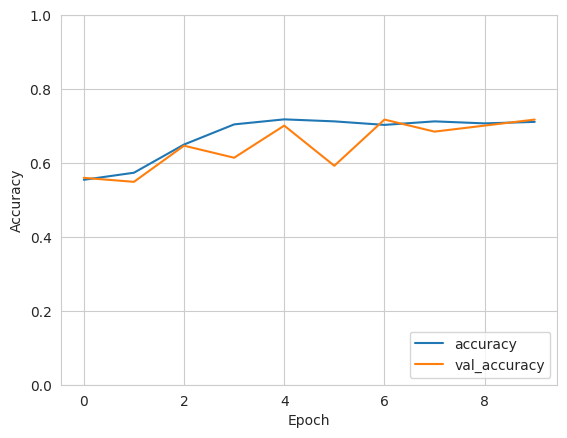

In [109]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

seed = 42
tf.random.set_seed(seed)

# Load the dataset using Pandas
data = pd.read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")

# Ensure the target variable is in numerical format
label_encoder = LabelEncoder()
data['HeartDisease'] = label_encoder.fit_transform(data['HeartDisease'])

# Select columns with integer data types
integer_columns = data.select_dtypes(include=['int']).columns

# Define features (X) and target variable (y)
X = data[integer_columns].drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Train the model with the defined checkpoint callback
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[checkpoint])

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#### 5. Checkpoint Best Neural Network Model only

Epoch 1/10
22/23 [===========================>..] - ETA: 0s - loss: 21.5276 - accuracy: 0.5170
Epoch 1: val_accuracy improved from -inf to 0.56522, saving model to weights.best.hdf5
23/23 [==============================] - 2s 25ms/step - loss: 20.8242 - accuracy: 0.5136 - val_loss: 3.7642 - val_accuracy: 0.5652
Epoch 2/10
18/23 [======================>.......] - ETA: 0s - loss: 3.3688 - accuracy: 0.6042
Epoch 2: val_accuracy did not improve from 0.56522
23/23 [==============================] - 0s 7ms/step - loss: 3.1872 - accuracy: 0.6158 - val_loss: 3.7663 - val_accuracy: 0.5598
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/23 [===========================>..] - ETA: 0s - loss: 2.0314 - accuracy: 0.6648
Epoch 3: val_accuracy improved from 0.56522 to 0.59783, saving model to weights.best.hdf5
23/23 [==============================] - 0s 14ms/step - loss: 2.0414 - accuracy: 0.6662 - val_loss: 2.4129 - val_accuracy: 0.5978
Epoch 4/10
21/23 [==========================>...] - ETA: 0s - loss: 1.5774 - accuracy: 0.6667
Epoch 4: val_accuracy did not improve from 0.59783
23/23 [==============================] - 0s 12ms/step - loss: 1.5589 - accuracy: 0.6689 - val_loss: 1.8825 - val_accuracy: 0.5978
Epoch 5/10
19/23 [=======================>......] - ETA: 0s - loss: 1.3308 - accuracy: 0.6661
Epoch 5: val_accuracy improved from 0.59783 to 0.63587, saving model to weights.best.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.2785 - accuracy: 0.6689 - val_loss: 1.4510 - val_accuracy: 0.6359
Epoch 6/10
23/23 [==============================] - ETA: 0s - loss: 1.2139 - accuracy: 0.6689
Epoch 6: val_a

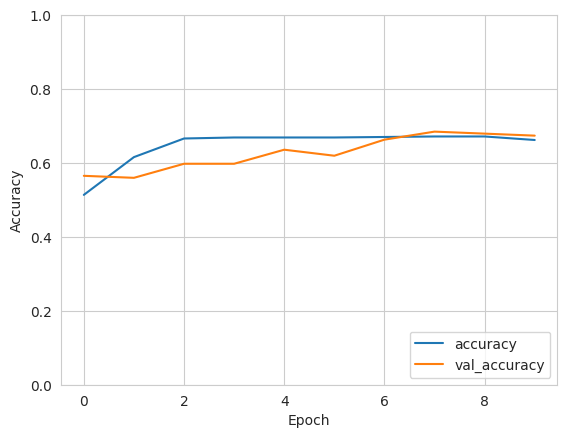

In [110]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

seed = 42
tf.random.set_seed(seed)

# Load the dataset using Pandas
data = pd.read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")

# Ensure the target variable is in numerical format
label_encoder = LabelEncoder()
data['HeartDisease'] = label_encoder.fit_transform(data['HeartDisease'])

# Select columns with integer data types
integer_columns = data.select_dtypes(include=['int']).columns

# Define features (X) and target variable (y)
X = data[integer_columns].drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Checkpoint the weights for the best model on validation accuracy
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=callbacks_list)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#### 6. Load a saved Neural Network model

In [117]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/weights.best.hdf5')

# Compile the loaded model (if needed)
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Created model and loaded weights from file")

# Evaluate the loaded model on test data
loss, accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy: {accuracy*100:.2f}%')

Created model and loaded weights from file
accuracy: 68.48%


#### 7. Visualize Model Training History in Keras

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


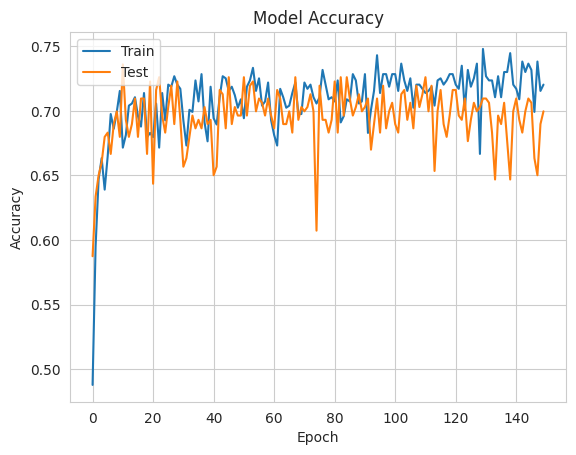

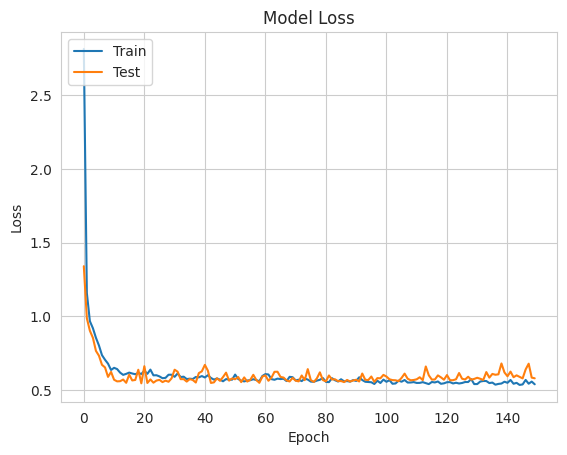

In [118]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")

# Ensure the target variable is in numerical format
label_encoder = LabelEncoder()
data['HeartDisease'] = label_encoder.fit_transform(data['HeartDisease'])

# Select columns with integer data types
integer_columns = data.select_dtypes(include=['int']).columns

# Define features (X) and target variable (Y)
X = data[integer_columns].drop('HeartDisease', axis=1)
Y = data['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Create the model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=10, verbose=0)

# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### 8. Show the application of Dropout Regularization

In [24]:
# Baseline Model on the Heart Disease Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load dataset
dataframe = pd.read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")

# Split into input (X) and output (Y) variables
X = dataframe.drop('HeartDisease', axis=1)
Y = dataframe['HeartDisease']

# Encode categorical variables (if any)
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# Define K-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Evaluate pipeline
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Baseline: 82.24% (3.59%)


#### 9. Show the application of Dropout on the visible layer

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load dataset
dataframe = pd.read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")

# Split into input (X) and output (Y) variables
X = dataframe.drop('HeartDisease', axis=1)
Y = dataframe['HeartDisease']

# Encode categorical variables (if any)
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Dropout on the visible layer
def create_visible_dropout_model():
    # Create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(X.shape[1],)))  # Dropout applied to the visible layer with a rate of 0.2
    model.add(Dense(60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_visible_dropout_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# Define K-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Evaluate pipeline
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: 

Visible: 80.73% (6.03%)


#### 10. Show the application of Dropout on the hidden layer

In [29]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier

# Load dataset
dataframe = read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")
# Assuming the last column is your target variable HeartDisease
X = dataframe.drop(columns=['HeartDisease'])
Y = dataframe['HeartDisease']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Encode target variable
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Splitting the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the model
def create_model():
    model = Sequential()
    model.add(Dense(60, input_shape=(X_train.shape[1],), activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Wrapping the model for scikit-learn compatibility
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# Cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Hidden: 84.20% (2.43%)


#### 11. Show the application of a time-based learning rate schedule

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataframe = pd.read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")

# Split into input (X) and output (Y) variables
X = dataframe.drop('HeartDisease', axis=1)
Y = dataframe['HeartDisease']

# Encode categorical variables (if any)
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Create model
model = Sequential()
model.add(Dense(60, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model with time-based learning rate decay
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(X, encoded_Y, validation_split=0.33, epochs=epochs, batch_size=16, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:32: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
39/39 - 4s - 99ms/step - accuracy: 0.5626 - loss: 60659896.0000 - val_accuracy: 0.4587 - val_loss: 0.7043
Epoch 2/50
39/39 - 1s - 20ms/step - accuracy: 0.6000 - loss: 0.6749 - val_accuracy: 0.4587 - val_loss: 0.7302
Epoch 3/50
39/39 - 1s - 14ms/step - accuracy: 0.6000 - loss: 0.6734 - val_accuracy: 0.4587 - val_loss: 0.7346
Epoch 4/50
39/39 - 1s - 25ms/step - accuracy: 0.6000 - loss: 0.6735 - val_accuracy: 0.4587 - val_loss: 0.7443
Epoch 5/50
39/39 - 0s - 6ms/step - accuracy: 0.6000 - loss: 0.6732 - val_accuracy: 0.4587 - val_loss: 0.7050
Epoch 6/50
39/39 - 0s - 8ms/step - accuracy: 0.6000 - loss: 0.6734 - val_accuracy: 0.4587 - val_loss: 0.7318
Epoch 7/50
39/39 - 0s - 7ms/step - accuracy: 0.6000 - loss: 0.6738 - val_accuracy: 0.4587 - val_loss: 0.7394
Epoch 8/50
39/39 - 0s - 4ms/step - accuracy: 0.6000 - loss: 0.6749 - val_accuracy: 0.4587 - val_loss: 0.7296
Epoch 9/50
39/39 - 0s - 8ms/step - accuracy: 0.6000 - loss: 0.6759 - val_accuracy: 0.4587 - val_loss: 0.7260
Epoch 10

#### 12. Show the application of a drop-based learning rate schedule

In [32]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Load dataset
dataframe = pd.read_csv("/content/drive/MyDrive/ass8_dataset/heart.csv")

# Split into input (X) and output (Y) variables
X = dataframe.drop('HeartDisease', axis=1)
Y = dataframe['HeartDisease']

# Encode categorical variables (if any)
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Define the drop-based learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# Create model
model = Sequential()
model.add(Dense(60, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Learning rate schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Fit the model
model.fit(X, encoded_Y, validation_split=0.33, epochs=50, batch_size=16, callbacks=callbacks_list, verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 - 2s - 59ms/step - accuracy: 0.5756 - loss: 46593.6680 - val_accuracy: 0.4587 - val_loss: 0.7021 - learning_rate: 0.1000
Epoch 2/50
39/39 - 1s - 31ms/step - accuracy: 0.6000 - loss: 0.6816 - val_accuracy: 0.4587 - val_loss: 0.6937 - learning_rate: 0.1000
Epoch 3/50
39/39 - 1s - 31ms/step - accuracy: 0.5610 - loss: 0.6818 - val_accuracy: 0.4587 - val_loss: 0.7322 - learning_rate: 0.1000
Epoch 4/50
39/39 - 1s - 34ms/step - accuracy: 0.6000 - loss: 0.6793 - val_accuracy: 0.4587 - val_loss: 0.7005 - learning_rate: 0.1000
Epoch 5/50
39/39 - 1s - 31ms/step - accuracy: 0.6000 - loss: 0.6755 - val_accuracy: 0.4587 - val_loss: 0.7454 - learning_rate: 0.1000
Epoch 6/50
39/39 - 1s - 16ms/step - accuracy: 0.6000 - loss: 0.6733 - val_accuracy: 0.4587 - val_loss: 0.7043 - learning_rate: 0.1000
Epoch 7/50
39/39 - 1s - 14ms/step - accuracy: 0.6000 - loss: 0.6783 - val_accuracy: 0.4587 - val_loss: 0.7212 - learning_rate: 0.1000
Epoch 8/50
39/39 - 0s - 10ms/step - accuracy: 0.6000 - loss: 0.6821 -

# **Saved Models + Saved Network Weights in HDF5 Format**

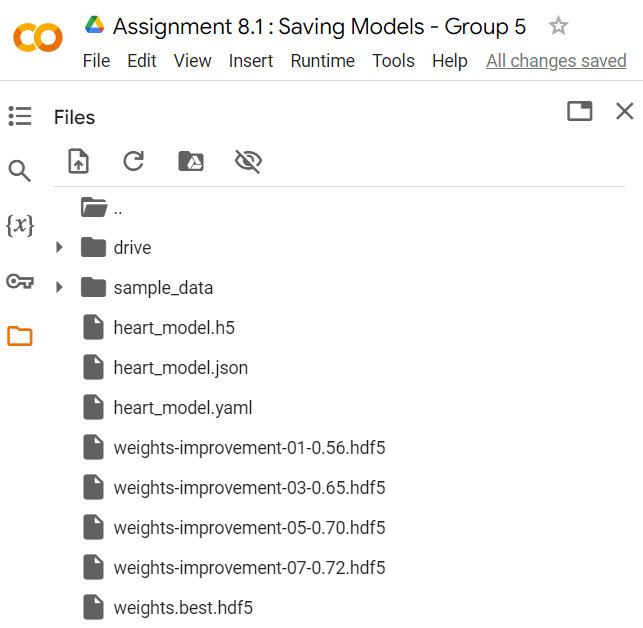

In [34]:
from IPython.display import Image

image_path = "/content/ss.png"

Image(filename=image_path)

here is the drive for all of these files:

https://drive.google.com/drive/folders/1-Dz_nra0_boqXRbh4Cq0UB78OR63lKp9?usp=sharing

here is the Google Drive for the dataset that the team used for this activity:

https://drive.google.com/drive/folders/1ZFHNZTfSxz-wQEHvECmJXYLr1bzz3UPp?usp=sharing

# **Proof of Collaboration**

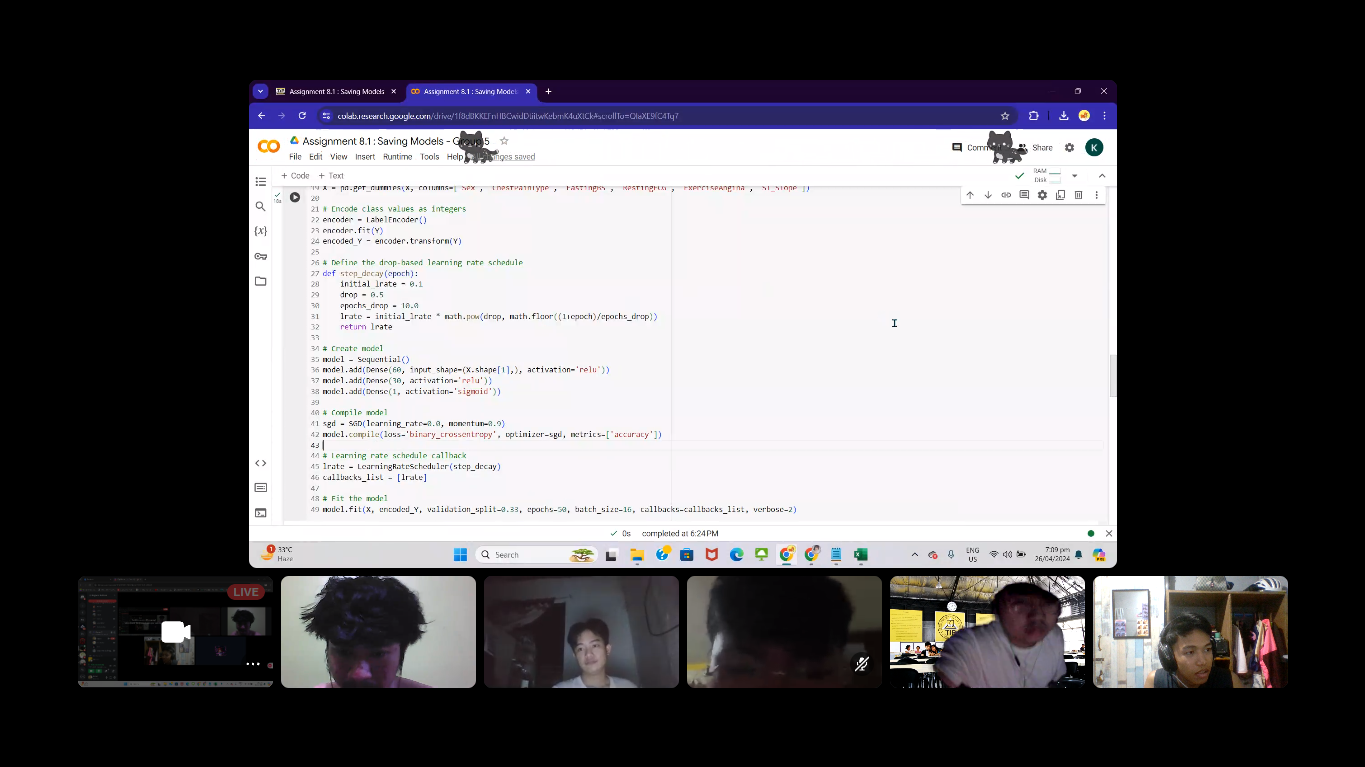

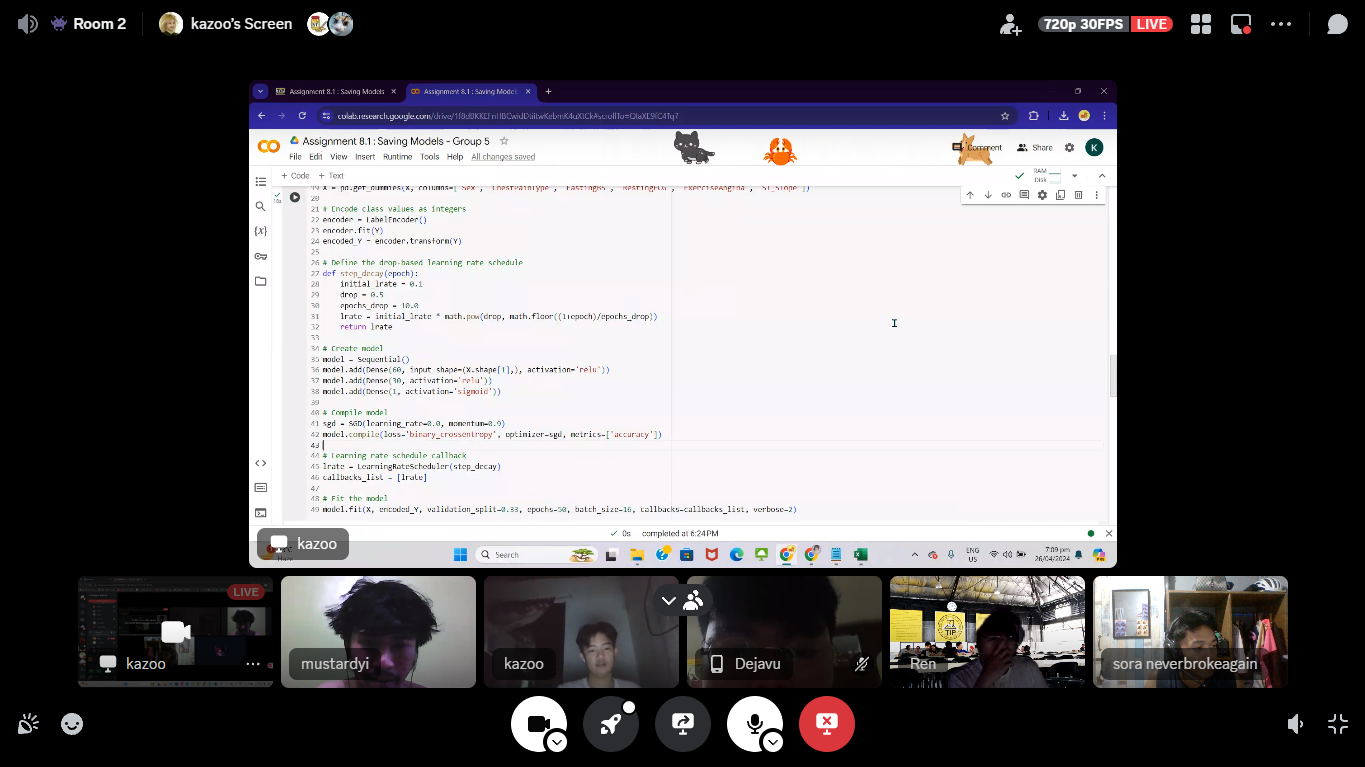

In [39]:
from IPython.display import Image, display

# Image paths
image_paths = ["/content/poc1.png", "/content/poc2.png"]

# Display images side by side
for path in image_paths:
    display(Image(path))

# **Conclusion / Learning**

This project delved into multiple facets of neural network modeling and training using the heart disease dataset. We effectively constructed, trained, assessed, and stored a neural network model tailored for classification purposes. Employing model checkpointing guaranteed the preservation of the top-performing model for subsequent use. Furthermore, we implemented dropout regularization and learning rate schedules to enhance the model's ability to generalize and mitigate overfitting. Analyzing the training history visually offered valuable insights into how the model performed across different epochs.

Using Keras to create and train neural network models to solve a classification problem in real-world circumstances, this project provided hands-on learning experience. Gaining knowledge in preprocessing data, designing neural networks, and applying regularization techniques and learning rate modifications are essential competencies in machine learning. Moreover, the ability to store and load models in various formats ensures their durability and flexibility, which is essential for implementing machine learning solutions in real-world scenarios. All things considered, this project improved knowledge and proficiency with neural network modeling and training methods.

Overall, the team successfully performed various tasks. Firstly, the team found a dataset applicable to either a classification problem or a regression problem; the team chose a dataset suitable for a classification problem. Secondly, the team created a model and saved it in HDF5 format, as well as saved and loaded it in JSON and YAML formats. Then, the team implemented checkpointing for neural network model improvements and for the best neural network model only. The team also loaded and saved neural network models and visualized model training history in Keras. Lastly, the team demonstrated the application of dropout regularization on the visible layer and the hidden layer, as well as implemented both a time-based and a drop-based learning rate schedule.